### The HJB equation:

\begin{align*}
-\partial_t\phi(x,t) + \max\{-V(x,t;a)\cdot\nabla\phi(x,t)-l(x,t,a,\rho)\}=\sigma\Delta\phi(x,t)
\end{align*}

We have:

\begin{cases}
\mathrm{d}y(x) = V(y,s,\alpha,\rho)\mathrm{d}t+\sqrt{2\sigma}\mathrm{d}W_s\\
y(t) = x
\end{cases}
The cost function is
$$
J(x,t) = \int_{t}^{T}l(y,s,\alpha,\rho)\mathrm{d}s+g(y(T)).
$$

### The semi-Lagrangian scheme:

\begin{align*}
\phi(x,t^n) = \min\{&\int_{t^n}^{t^{n+1}} l(x,s,a,\rho)\mathrm{d}s\\
&+\frac{1}{2}(\phi(x+V\Delta t+\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1})+\phi(x+V\Delta t-\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1}))\}\\
= \min\{& l(x,t^{n+1},a,\rho)\Delta t\\
&+\frac{1}{2}(\phi(x+V\Delta t+\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1})+\phi(x+V\Delta t-\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1}))\}
\end{align*}

Here, I consider $2d$ case. For simplicity, here I use 
$$
x=(x_1,x_2)\\
(V\Delta t+\sqrt{2\sigma\Delta t})^2 = (V\Delta t+\sqrt{2\sigma\Delta t})\cdot(V\Delta t+\sqrt{2\sigma\Delta t})
$$ 

By Taylor, we have 

\begin{cases}
&\phi(x+V\Delta t+\sqrt{2\sigma\Delta t}, t^{n+1})=\phi(x, t^{n+1})+\nabla\phi(x,t^{n+1})\cdot(V\Delta t+\sqrt{2\sigma\Delta t})\\
&+\frac{1}{2}(\partial_{x_1x_1}\phi(x,t^{n+1})+2\partial_{x_1x_2}\phi(x,t^{n+1})+\partial_{x_2x_2}\phi(x,t^{n+1}))(V\Delta t+\sqrt{2\sigma\Delta t})^2\\[10pt]
&\phi(x+V\Delta t-\sqrt{2\sigma\Delta t}, t^{n+1})=\phi(x, t^{n+1})+\nabla\phi(x,t^{n+1})\cdot(V\Delta t-\sqrt{2\sigma\Delta t})\\
&+\frac{1}{2}(\partial_{x_1x_1}\phi(x,t^{n+1})+2\partial_{x_1x_2}\phi(x,t^{n+1})+\partial_{x_2x_2}\phi(x,t^{n+1}))(V\Delta t-\sqrt{2\sigma\Delta t})^2
\end{cases}

Adding these last two terms, we have

\begin{align*}
&\frac{1}{2}((V^2\Delta t^2+2\sqrt{2\sigma\Delta t}V\Delta t+2\sigma\Delta t)+(V^2\Delta t^2-2\sqrt{2\sigma\Delta t}V\Delta t+2\sigma\Delta t))\cdot(\Delta\phi(x,t^{n+1}))\\
&=(V^2\Delta t^2+2\sigma\Delta t)(\Delta\phi(x,t^{n+1}))\\
&=2\sigma\Delta t(\Delta\phi(x,t^{n+1}))+o(\Delta t)^2
\end{align*}

 Adding the equations, we can get
 
\begin{align*}
    \phi(x,t^n) &= \min\{\int_{t^n}^{t^{n+1}} l(x,s,a,\rho)\mathrm{d}s+(\phi(x, t^{n+1})+V\Delta t\nabla\phi(x,t^{n+1}) + \sigma\Delta t\Delta\phi(x,t^{n+1}))\}\\
    &=\min\{l(x, t^{n+1})\Delta t+(\phi(x, t^{n+1})+V\Delta t\nabla\phi(x,t^{n+1}) + \sigma\Delta t\Delta\phi(x,t^{n+1}))\}
\end{align*}

Dividing $\Delta t$, we can get

\begin{align*}
-\frac{\phi(x,t^{n+1})-\phi(x,t^n)}{\Delta t} + \max\{-V\nabla\phi(x,t^{n+1})-l(x, t^{n+1})\} = \sigma\Delta\phi(x,t^{n+1})
\end{align*}

In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
np.set_printoptions(threshold=np.inf, linewidth=200, suppress=True)

In [ ]:
T = 0.5
Nt = 600
dt = T / Nt

sigma = 0.05

Nx = 50
Ny = 50
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

K = 32  # number of boundary points
theta = np.linspace(0, 2 * np.pi, K, endpoint=False) 
alphas = np.stack((np.cos(theta), np.sin(theta)), axis=1)  # (K, 2) array
alpha_groups = np.array_split(alphas, 4)

phi = np.zeros((len(x), len(y), Nt))
rho = np.zeros((len(x), len(y), Nt))


x_mask = (x >= 0.1) & (x <= 0.25)
y_mask = (y >= 0.1) & (y <= 0.25)

def l(rho):
    return 3*rho

def g(x, y):
    return np.sqrt((x-0.5)**2 + (y-0.5)**2)

def V(alpha):
    return alpha

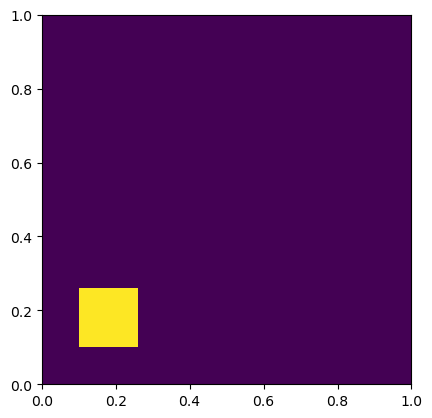

In [ ]:
"""   
Initial Guess for rho
rho(t=0) = rho(t=0.1) = rho(t=0.2) = ....
"""
rho[np.ix_(x_mask, y_mask)] = 0.4   # Initial guess for rho
plt.imshow(rho[:, :, 0], extent=[0, 1, 0, 1], origin='lower', cmap='viridis') 

In [91]:
phi[:, :, -1] = g(X, Y)
for t in range(Nt-1, 1, -1):
    s1 = np.zeros((K, 2)) # phi(x+s1)
    s2 = np.zeros((K, 2)) # phi(x+s2)
    Vs = np.zeros((K,2))
    s1 = V(alphas)*dt + np.sqrt(2*dt*sigma)
    s2 = V(alphas)*dt - np.sqrt(2*dt*sigma)

    N = Nx * Ny
    grid_points = np.stack([X.ravel(), Y.ravel()], axis=1)  # shape: (N, 2)

    grid_points_expanded = grid_points[:, None, :]

    s1_expanded = s1[None, :, :]                        

    all_points1 = grid_points_expanded + s1_expanded        # shape: (N, k, 2)
    all_points1 = all_points1.reshape(-1, 2)                # shape: (K*N, 2)


    s2_expanded = s2[None, :, :]
    all_points2 = grid_points_expanded + s2_expanded        # shape: (N, k, 2)
    all_points2 = all_points2.reshape(-1, 2)                # shape: (K*N, 2)

    def soft_penalty(p):
        p = np.array(p)
        clipped_p = np.clip(p, [x[0], y[0]], [x[-1], y[-1]])
        distance = np.linalg.norm(clipped_p - p)
        interp_val = v_interp_raw(clipped_p)
        return interp_val + 100*distance**2

    v_interp_raw = RegularGridInterpolator((x, y), phi[:,:,t],  bounds_error=False, fill_value=None)
    H = 1/2 * (soft_penalty(all_points1) + soft_penalty(all_points2))
    H = H.reshape(Nx, Ny, K)
    H = np.min(H, axis=2)  # shape: (Nx, Ny)

    phi[:, :, t-1] = H + l(rho[:, :, t]) * dt

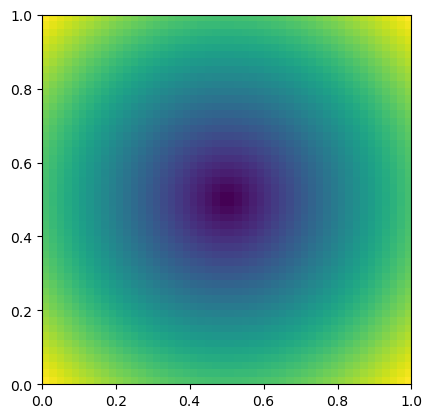

In [95]:
plt.imshow(phi[:, :, Nt-1], extent=[0, 1, 0, 1], origin='lower', cmap='viridis')

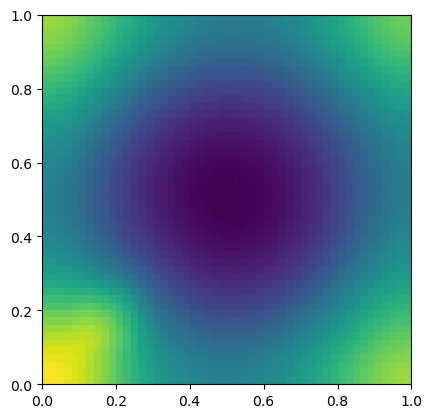

In [94]:
plt.imshow(phi[:, :, Nt//2], extent=[0, 1, 0, 1], origin='lower', cmap='viridis')

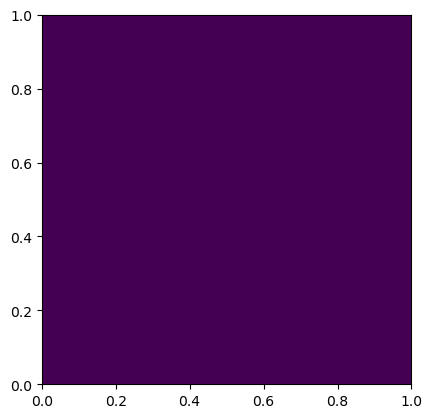

In [93]:
plt.imshow(phi[:, :, 0], extent=[0, 1, 0, 1], origin='lower', cmap='viridis')